<a href="https://colab.research.google.com/github/nikitakandpal/ML-projects/blob/main/Song_popularity_predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting the popularity of the song is the main objective.

The project is simple yet challenging: predicting the popularity of a song based on factors such as energy, acoustic qualities, instrumentation, liveliness, danceability, etc. The dataset is large, and its complexity arises from the strong multicollinearity present.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr
import warnings

In [75]:
df = pd.read_csv("song_data.csv")

Q1. Summarizing the data

In [76]:
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


We have uniformm values for all the features so no need to handle missing values by removing or adding values.

How much data is present?

In [78]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 18835
Number of columns: 15


So we have summarized that the amount of data present in the Song data is as retured by data.shape

18835 rows × 15 columns

In [79]:
for col in df.columns:
  print(col, ':',len(df[col].unique()), 'labels')

song_name : 13070 labels
song_popularity : 101 labels
song_duration_ms : 11771 labels
acousticness : 3209 labels
danceability : 849 labels
energy : 1132 labels
instrumentalness : 3925 labels
key : 12 labels
liveness : 1425 labels
loudness : 8416 labels
audio_mode : 2 labels
speechiness : 1224 labels
tempo : 12112 labels
time_signature : 5 labels
audio_valence : 1246 labels


The list of **continuous valued** features are:
*   acousticness      18835 non-null  float64
*   danceability      18835 non-null  float64
*   energy            18835 non-null  float64
*   instrumentalness  18835 non-null  float64
*   liveness          18835 non-null  float64
*   loudness          18835 non-null  float64
*   speechiness       18835 non-null  float64
*   tempo             18835 non-null  float64
*   audio_valence     18835 non-null  float64

Since,

*   song_popularity (int64) has 101 labels
*   song_duration_ms (int64) has 11771 labels

We consider them as **continuous features**.





The list of **categorical features** are:
*   song_name         18835 non-null  object

Since,
*   key has only 12 labels
*   audio_mode has only 2 labels
*   time_signature has only 5 labels

We consider them as **categorical features** as we can categorize them under these countable values.







Q2 Statistical Values

In [80]:
statistics = df.describe()
print(statistics)

       song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%   

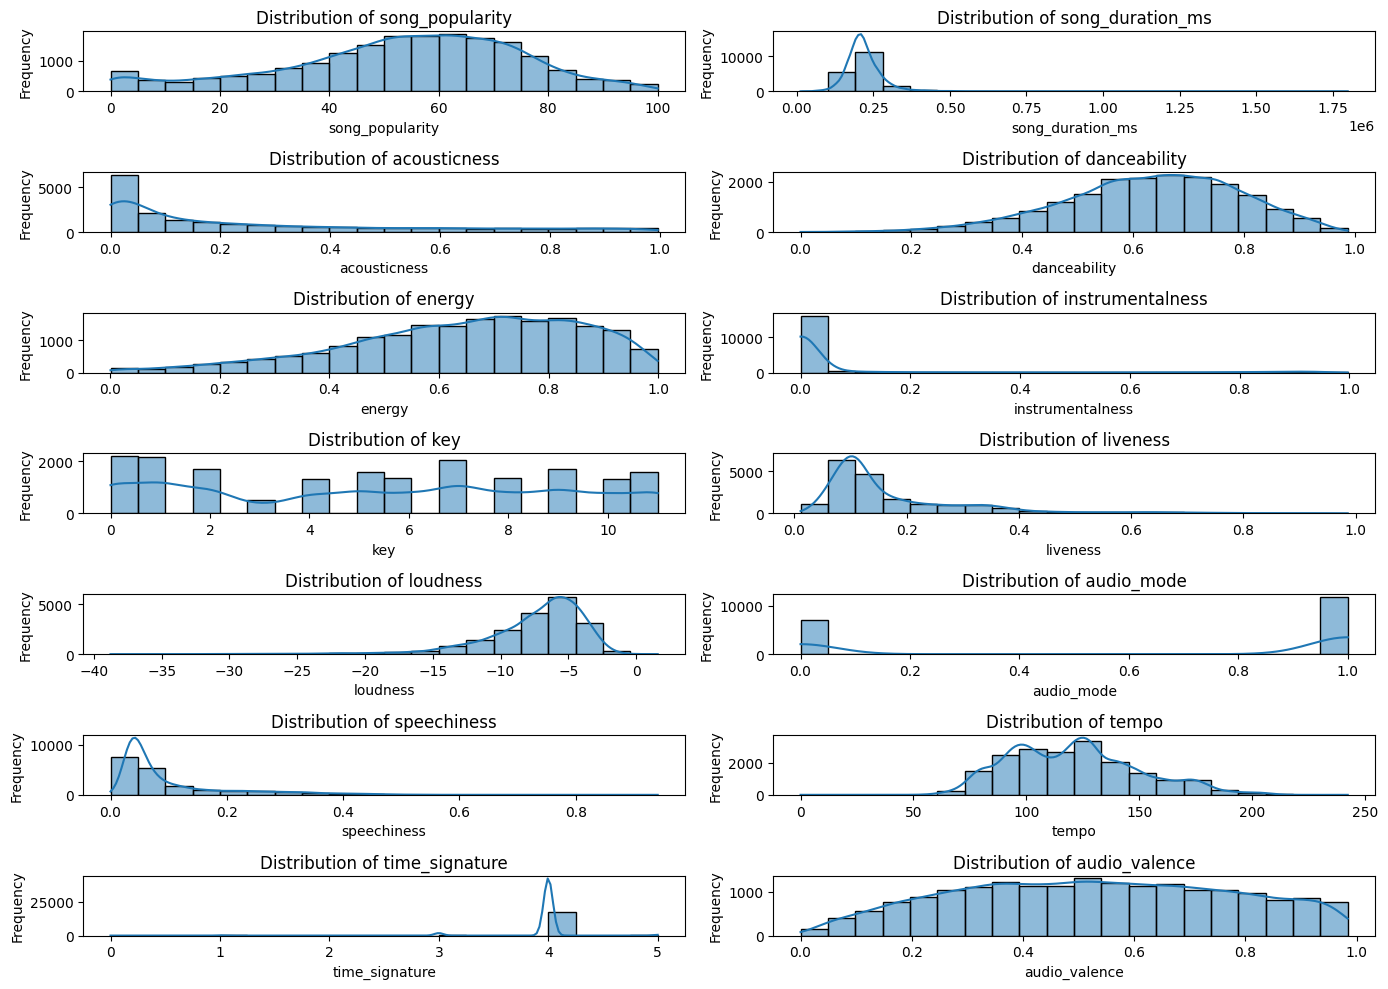

In [81]:
# Get columns of interest (floats and ints)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for subplots
num_rows = len(numeric_columns) // 2 + len(numeric_columns) % 2
num_cols = 2  # Two columns of subplots

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the numeric columns and plot histograms
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots (if the number of columns is odd)
if len(numeric_columns) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

Now we check for outliers using the Interquartile Range (IQR) method

In [82]:
columns_to_check = ['song_popularity','song_duration_ms','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','audio_valence' ]

# Define a function to detect outliers using IQR
def detect_outliers(df):
    Q1 = np.percentile(df, 25)
    Q3 = np.percentile(df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df < lower_bound) | (df > upper_bound)

# Check for outliers in each column
for column in columns_to_check:
    outliers = detect_outliers(df[column])
    num_outliers = outliers.sum()
    print(f"Number of outliers in {column}: {num_outliers}")
#This code defines a detect_outliers function that calculates outliers using the IQR method and then checks for outliers in the specified columns. You can adjust the threshold (1.5 times IQR) based on your dataset and problem context.

Number of outliers in song_popularity: 0
Number of outliers in song_duration_ms: 824
Number of outliers in acousticness: 0
Number of outliers in danceability: 133
Number of outliers in energy: 151
Number of outliers in instrumentalness: 4070
Number of outliers in liveness: 1205
Number of outliers in loudness: 705
Number of outliers in speechiness: 2175
Number of outliers in tempo: 81
Number of outliers in audio_valence: 0


We require special treatment in removing the duplicate songs, and we sort the data in descending order of song populatrity.

In [83]:
df = df.drop_duplicates(subset='song_name')
df = df.sort_values('song_popularity', ascending=False)

In [84]:
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4299,Happier,100,214289,0.1910,0.687,0.792,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,0.671
1229,I Love It (& Lil Pump),99,127946,0.0114,0.901,0.522,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,0.329
4329,Promises (with Sam Smith),98,213309,0.0119,0.781,0.768,0.000005,11,0.3250,-5.991,1,0.0394,123.070,4,0.486
4302,Eastside (with Halsey & Khalid),98,173799,0.5550,0.560,0.680,0.000000,6,0.1160,-7.648,0,0.3210,89.391,4,0.319
61,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.1530,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16779,I'm a Slave 4 U,0,203760,0.4260,0.843,0.843,0.000108,8,0.1110,-3.573,1,0.1170,110.030,4,0.963
8688,Hard Work Pays Off,0,224506,0.3270,0.736,0.482,0.000000,4,0.2290,-8.242,1,0.1960,140.064,4,0.608
3435,Coupe (feat. Rich The Kid),0,194632,0.0520,0.843,0.643,0.000000,11,0.0973,-8.420,1,0.2170,150.033,4,0.851
8940,Jet Lag (feat. Young Scooter),0,271066,0.2660,0.810,0.458,0.000000,4,0.1740,-7.495,0,0.1050,125.049,4,0.493


We can see that after removing duplicate songs the number of rows reduced to 13070 and the songs are arranged in descending order of their popularity.

Now we check if there are any null values for any rows for feature and if
*   we want to remove those rows
*   get rid of whole attribute
*   set missing value to some value (0,mean,median)

In [85]:
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

There are no null values for any feature.


Now, Check for skewness in numerical features and apply log transformation if skewness exceeds a threshold.

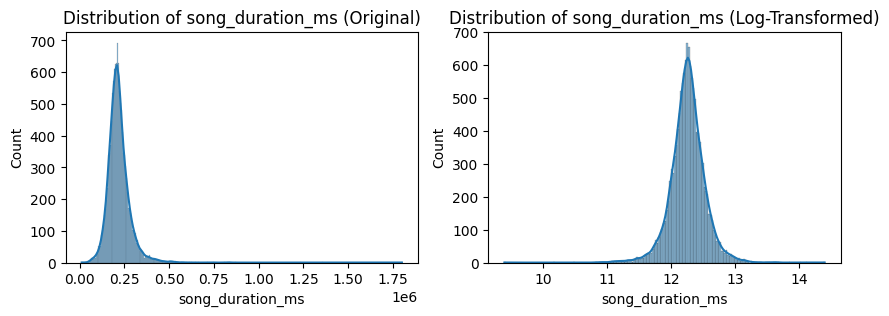

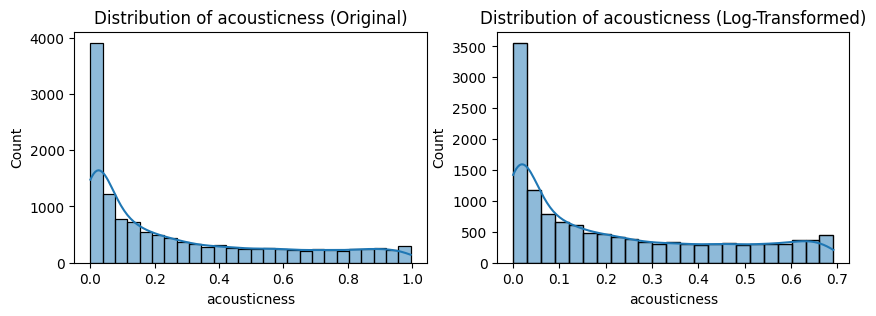

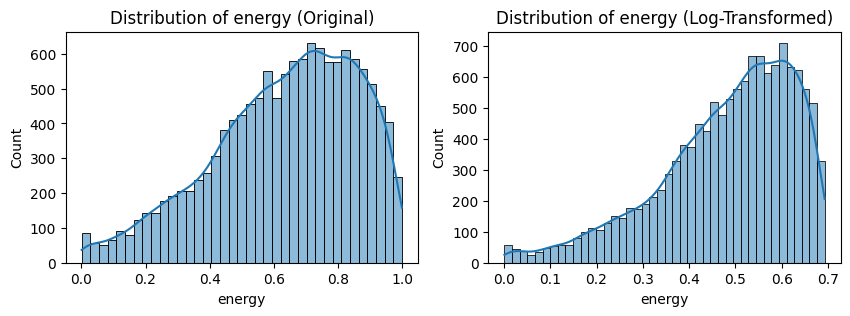

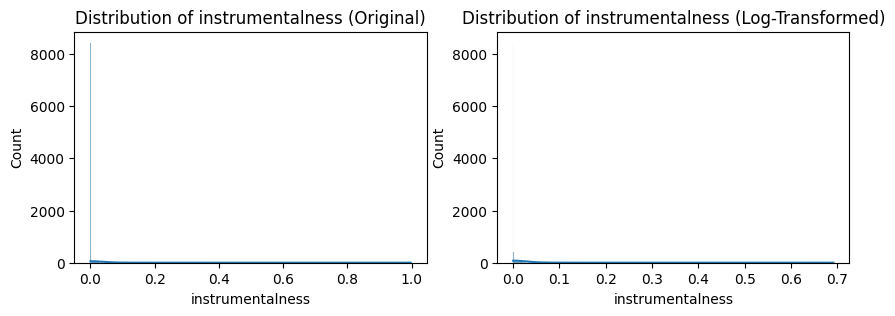

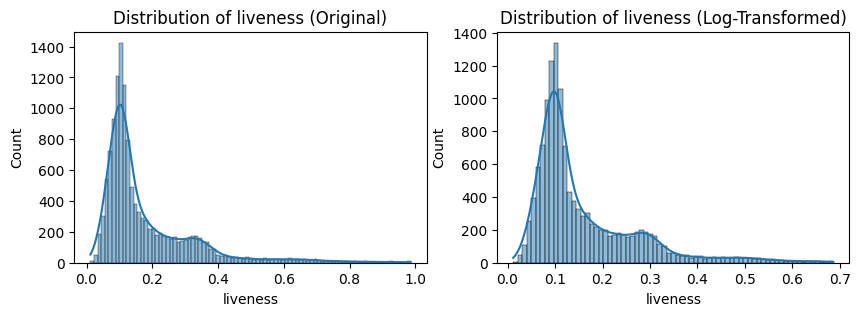

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


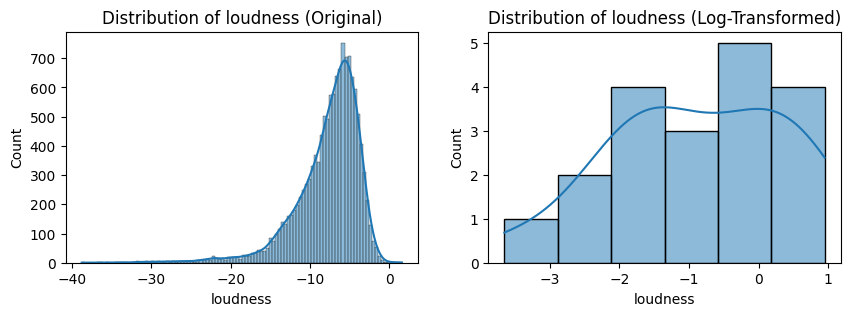

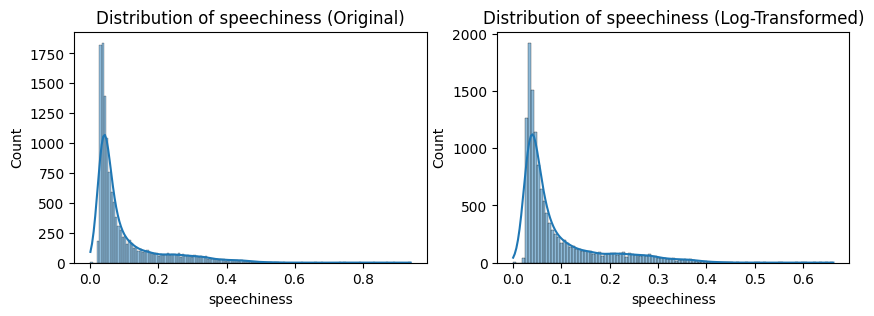

Columns Log-Transformed: ['song_duration_ms', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness']


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

def check_and_apply_log_transform(df, numerical_columns, skew_threshold=0.5, plot=False):
    """

    Parameters:
    - df: DataFrame containing the dataset.
    - numerical_columns: List of numerical column names to check and transform.
    - skew_threshold: Threshold for skewness (default is 0.5).
    - plot: Boolean indicating whether to plot histograms before and after transformation (default is False).

    Returns:
    - transformed_df: DataFrame with log-transformed features.
    - transformed_columns: List of columns that were log-transformed.
    """
    transformed_df = df.copy()
    transformed_columns = []

    for column in numerical_columns:
        # Calculate skewness
        skewness = skew(df[column])

        if abs(skewness) > skew_threshold:
            # Apply log transformation
            transformed_df[column] = np.log1p(df[column])
            transformed_columns.append(column)

            if plot:
                # Plot histograms before and after transformation
                plt.figure(figsize=(10, 3))
                plt.subplot(1, 2, 1)
                sns.histplot(df[column], kde=True)
                plt.title(f'Distribution of {column} (Original)')
                plt.subplot(1, 2, 2)
                sns.histplot(transformed_df[column], kde=True)
                plt.title(f'Distribution of {column} (Log-Transformed)')
                plt.show()

    return transformed_df, transformed_columns

# List of numerical columns to check for skewness and potentially transform
numerical_columns = ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
                     'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']

# Check for skewness and apply log transformation
transformed_df, transformed_columns = check_and_apply_log_transform(df, numerical_columns, skew_threshold=0.5, plot=True)

# Print the list of columns that were log-transformed
print("Columns Log-Transformed:", transformed_columns)


Now we perform min_max_scaling and then visualize the graphs.

In [87]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scale_dataframe_inplace(df, feature_names):
    """
    Perform Min-Max scaling on selected features in a DataFrame in-place (overwrites the original DataFrame).

    Parameters:
    - df: DataFrame containing the dataset.
    - feature_names: List of feature names to be scaled.

    Returns:
    None
    """

    # Initialize the Min-Max scaler
    scaler = MinMaxScaler()

    # Scale the specified features in the original DataFrame
    df[feature_names] = scaler.fit_transform(df[feature_names])

# Example usage:
# Specify the feature names you want to scale
features_to_scale = ['song_duration_ms', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'time_signature', 'audio_valence']

# Apply Min-Max scaling to the specified features in the original DataFrame 'df'
min_max_scale_dataframe_inplace(df, features_to_scale)



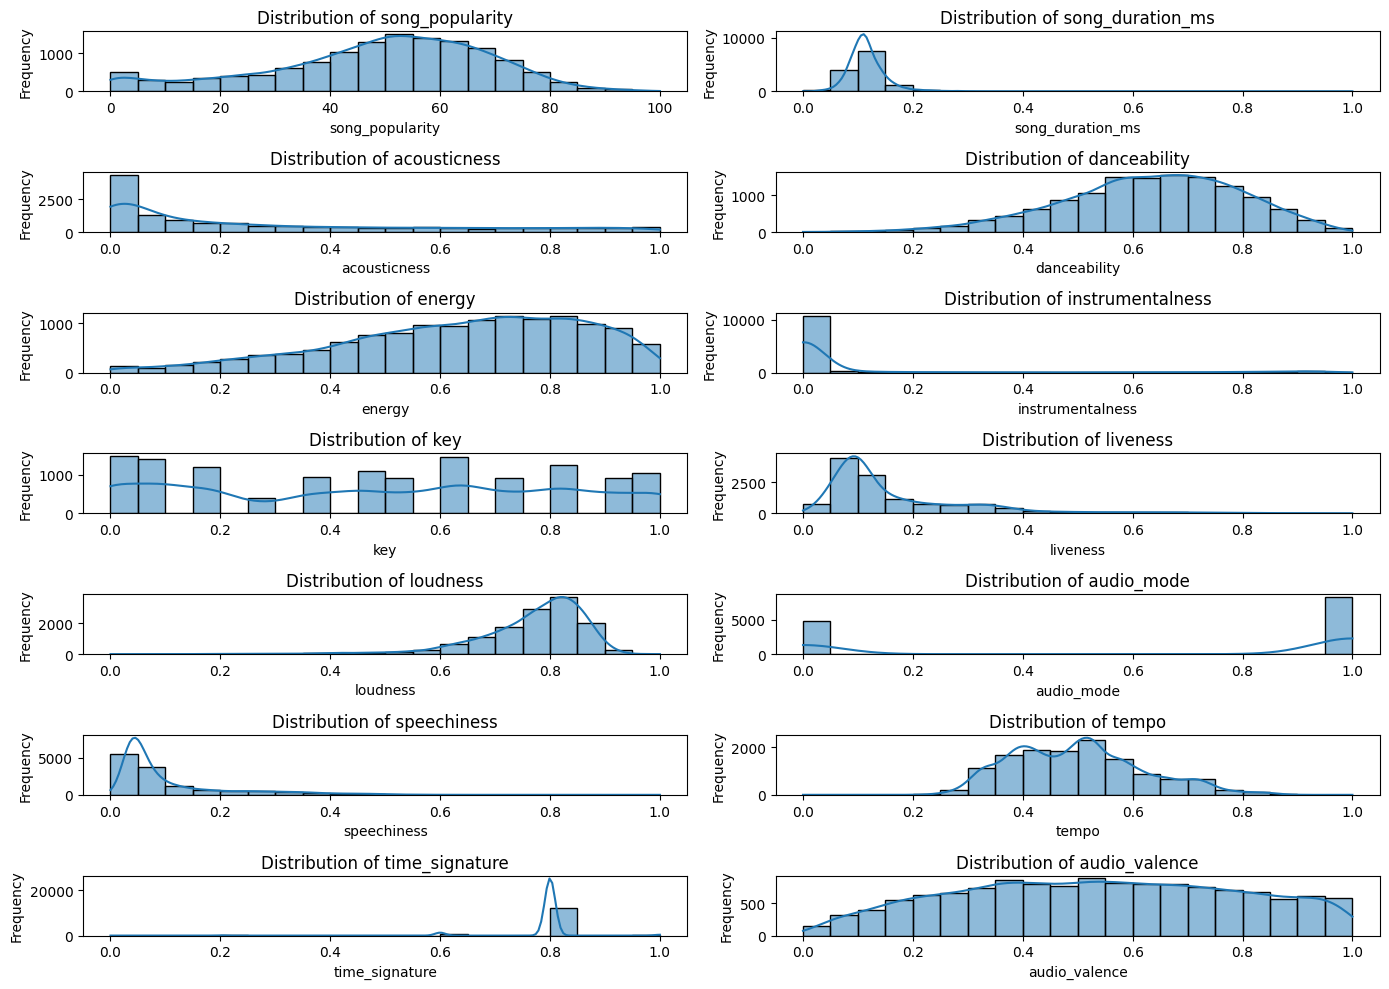

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get columns of interest (floats and ints)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for subplots
num_rows = len(numeric_columns) // 2 + len(numeric_columns) % 2
num_cols = 2  # Two columns of subplots

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the numeric columns and plot histograms
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots (if the number of columns is odd)
if len(numeric_columns) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


Replotting the graph after scaling the features

C. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

We will now check the Pearson Correlation Coefficients and plot the Pearson Correlation Heatmap.

In [89]:
df.corr()

<ipython-input-89-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.006965,-0.037154,0.052140,-0.012476,-0.091087,-0.000396,-0.034760,0.051184,0.000216,-0.000436,-0.026940,0.021449,-0.049775
song_duration_ms,-0.006965,1.000000,-0.121959,-0.085902,0.105677,-0.026923,-0.004156,0.023539,0.035422,-0.025588,-0.080819,0.017090,0.004168,-0.068409
acousticness,-0.037154,-0.121959,1.000000,-0.179665,-0.680703,0.186305,-0.001455,-0.089876,-0.572433,0.060194,-0.091555,-0.147054,-0.156349,-0.122776
danceability,0.052140,-0.085902,-0.179665,1.000000,0.063848,-0.127092,0.010822,-0.094310,0.181657,-0.100492,0.203907,-0.126737,0.139104,0.351737
energy,-0.012476,0.105677,-0.680703,0.063848,1.000000,-0.231004,0.016328,0.177608,0.770288,-0.048334,0.077742,0.181354,0.147634,0.312207
instrumentalness,-0.091087,-0.026923,0.186305,-0.127092,-0.231004,1.000000,-0.011115,-0.043846,-0.405287,-0.016623,-0.082353,-0.045582,-0.064888,-0.201873
key,-0.000396,-0.004156,-0.001455,0.010822,0.016328,-0.011115,1.000000,-0.003503,0.009943,-0.176612,0.027106,-0.006665,-0.012019,0.025762
liveness,-0.034760,0.023539,-0.089876,-0.094310,0.177608,-0.043846,-0.003503,1.000000,0.115486,-0.006903,0.089412,0.025983,0.011597,0.014258
loudness,0.051184,0.035422,-0.572433,0.181657,0.770288,-0.405287,0.009943,0.115486,1.000000,-0.057121,0.083615,0.142247,0.114710,0.213695
audio_mode,0.000216,-0.025588,0.060194,-0.100492,-0.048334,-0.016623,-0.176612,-0.006903,-0.057121,1.000000,-0.113466,0.024126,-0.024524,0.000384


In [90]:
correlation_matrix = df.corr(method='pearson')

<ipython-input-90-2663855e16a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


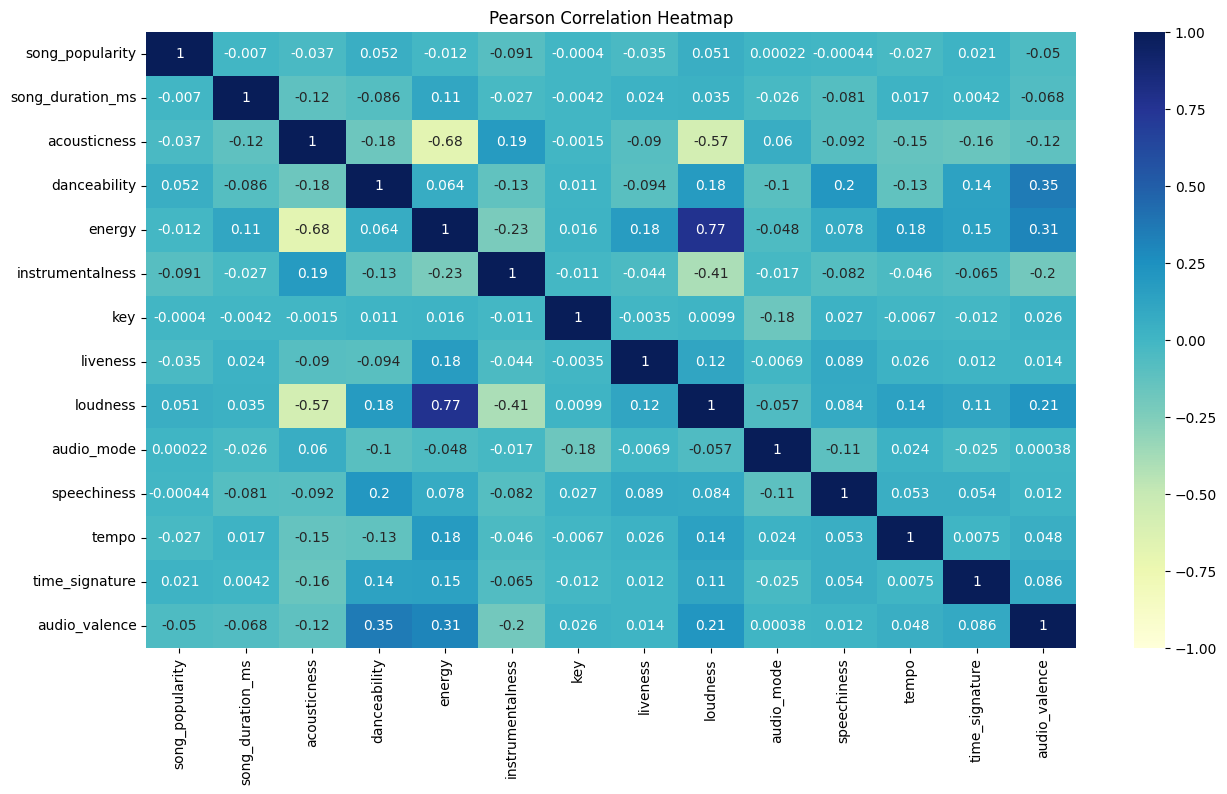

In [91]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

Energy and loudness are highly correlated; therefore, one can be dropped, and in this case, energy is the one being dropped.

In [92]:
df = df.drop('energy', axis=1)

In [93]:
# Assuming df is your DataFrame
# Define features (X) and target (y)
X = df[['song_duration_ms','danceability','tempo','acousticness','instrumentalness','key','liveness','loudness','audio_mode','speechiness','time_signature','audio_valence']]
y = df['song_popularity']

# Get the feature names
feature_names = X.columns.tolist()

# Compute Pearson Correlation Coefficients (PCC)
correlations = {}
for feature_name in feature_names:
    feature_data = X[feature_name]
    pcc, _ = pearsonr(feature_data, y)
    correlations[feature_name] = pcc

# Print PCC values
print("Pearson Correlation Coefficients:")
for feature, pcc in correlations.items():
    print(f"{feature}: {pcc:.2f}")

Pearson Correlation Coefficients:
song_duration_ms: -0.01
danceability: 0.05
tempo: -0.03
acousticness: -0.04
instrumentalness: -0.09
key: -0.00
liveness: -0.03
loudness: 0.05
audio_mode: 0.00
speechiness: -0.00
time_signature: 0.02
audio_valence: -0.05


Based on the provided coefficients, it seems that "instrumentalness," "acousticness," and "audio_valence" have relatively stronger negative correlations with song popularity, while "danceability" and "loudness" have relatively stronger positive correlations.

However, it's important to note that these correlations are relatively weak, indicating that the relationships between these features and song popularity are not very strong so we can combine them to determine the song popularity when building the linear regression model.

Here we are also combining 'tempo' and 'liveness'.

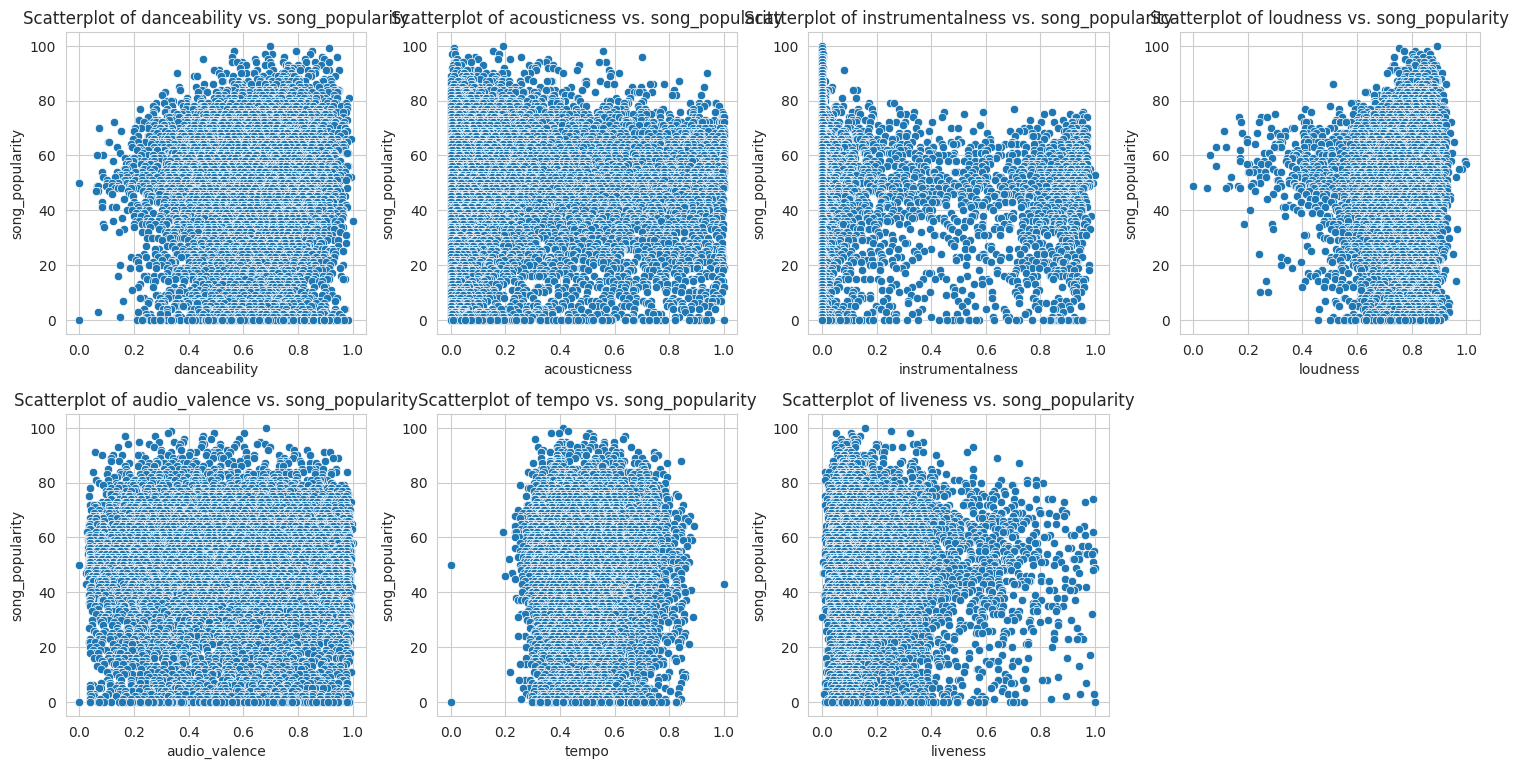

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
X = df[['danceability', 'acousticness', 'instrumentalness','loudness','audio_valence','tempo','liveness']]
y = df['song_popularity']

# Get the feature names
feature_names = X.columns.tolist()

# Set up subplots for scatterplots
plt.figure(figsize=(15, 15))
for i, feature_name in enumerate(feature_names, 1):
    plt.subplot(4, 4, i)  # 4x4 grid for 13 features
    sns.scatterplot(x=X[feature_name], y=y)
    plt.title(f'Scatterplot of {feature_name} vs. song_popularity')

plt.tight_layout()
plt.show()

D. Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

In [97]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Check the sizes of the training and testing sets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 10456
Testing set size: 2614


We use the function called train_test_split that helps you split your dataset into training and testing sets while preserving the distribution of data.

In [98]:
# Check summary statistics for the training set
print("Summary Statistics for Training Set:")
print(X_train.describe())
print("---------------------------------------------------------------------")
# Check summary statistics for the testing set
print("\nSummary Statistics for Testing Set:")
print(X_test.describe())

Summary Statistics for Training Set:
       song_duration_ms  danceability         tempo  acousticness  \
count      10456.000000  10456.000000  10456.000000  10456.000000   
mean           0.115487      0.633029      0.499539      0.279325   
std            0.035772      0.160468      0.119791      0.304147   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.095684      0.530902      0.404809      0.024773   
50%            0.111548      0.645390      0.495283      0.147589   
75%            0.129801      0.749747      0.577527      0.484939   
max            1.000000      0.987842      1.000000      1.000000   

       instrumentalness           key      liveness      loudness  \
count      10456.000000  10456.000000  10456.000000  10456.000000   
mean           0.097323      0.486176      0.173116      0.767352   
std            0.247992      0.325363      0.150260      0.102260   
min            0.000000      0.000000      0.000000      0.050529

We summarize the statistics for both sets, which allows us to compare their properties.
And as the properties are reasonably similar, it helps to indicate that the test set is representative of the entire dataset.

D. Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.

In [99]:
# Create and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Print the Linear Regression model summary
print("Linear Regression Model Summary:")
print(f"Intercept: {linear_reg.intercept_}")
print(f"Coefficients: {linear_reg.coef_}")

Linear Regression Model Summary:
Intercept: [8.32667268e-16]
Coefficients: [[ 4.20551283e-17  6.93889390e-16  1.00000000e+00 -3.46944695e-17
  -3.38271078e-16 -1.09612840e-16 -9.10729825e-17 -4.60135402e-16
   5.03069808e-17 -1.82145965e-16 -4.35198752e-16 -3.81639165e-16]]


Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric RMSE, MSE and MAE

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define your features (X) and target (y)
X = scaled_df[['danceability', 'acousticness', 'instrumentalness','loudness','audio_valence','tempo','liveness']]
y = scaled_df['song_popularity']

# Initialize the Linear Regression model
model = LinearRegression()

# Perform four-fold cross-validation and calculate RMSE (Root Mean Squared Error) as the evaluation metric
cross_val_scores = cross_val_score(model, X, y, cv=4, scoring='neg_mean_squared_error')
rmse_scores = (-cross_val_scores)**0.5  # Calculate RMSE from negative MSE scores

# Print the RMSE scores for each fold
for i, rmse in enumerate(rmse_scores, 1):
    print(f'Fold {i} RMSE: {rmse:.4f}')

# Calculate the mean RMSE across all folds
mean_rmse = rmse_scores.mean()
print(f'Mean RMSE across all folds: {mean_rmse:.4f}')

# Calculate Mean Squared Error (MSE)
mse_scores = -cross_val_scores
mean_mse = mse_scores.mean()
print(f'Mean MSE across all folds: {mean_mse:.4f}')

# Calculate Mean Absolute Error (MAE)
mae_scores = cross_val_score(model, X, y, cv=4, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores
mean_mae = mae_scores.mean()
print(f'Mean MAE across all folds: {mean_mae:.4f}')

Fold 1 RMSE: 0.3139
Fold 2 RMSE: 0.1253
Fold 3 RMSE: 0.0695
Fold 4 RMSE: 0.3901
Mean RMSE across all folds: 0.2247
Mean MSE across all folds: 0.0678
Mean MAE across all folds: 0.2117


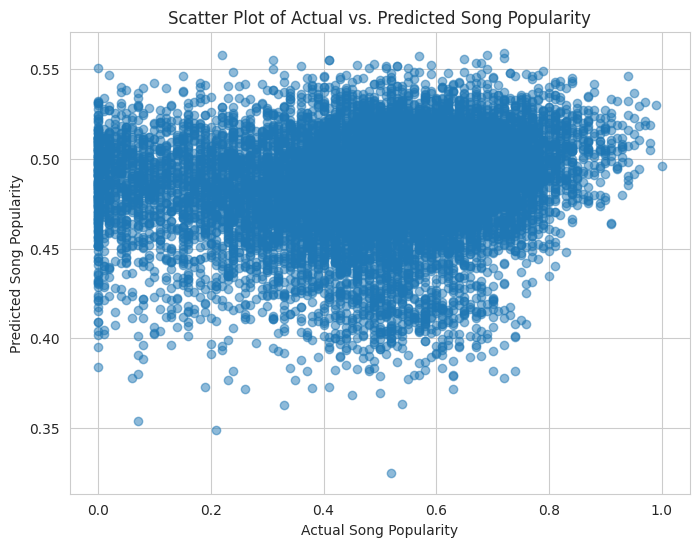

In [136]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define your features (X) and target (y)
X = scaled_df[['danceability', 'acousticness', 'instrumentalness','loudness','audio_valence','tempo','liveness']]
y = scaled_df['song_popularity']

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target values using the model
y_pred = model.predict(X)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Song Popularity")
plt.ylabel("Predicted Song Popularity")
plt.title("Scatter Plot of Actual vs. Predicted Song Popularity")
plt.grid(True)
plt.show()



In [137]:
import numpy as np

# Define your features (X) and target (y)
X = scaled_df[['danceability', 'acousticness', 'instrumentalness','loudness','audio_valence','tempo','liveness']]
y = scaled_df['song_popularity']

# Add a column of ones to X for the intercept term
X = np.column_stack([np.ones(len(X)), X])

# Calculate the coefficients using SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)
coefficients = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ y

# The coefficients are now stored in the 'coefficients' array
intercept = coefficients[0]
coefficients = coefficients[1:]

# Print the coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: 0.48279647117775965
Coefficients: [ 0.07585968 -0.00980319 -0.07618791  0.04206054 -0.07546262 -0.03887023
 -0.04711058]


In [133]:
import numpy as np

# Define your features (X) and target (y)
X = scaled_df[['danceability', 'acousticness', 'instrumentalness','loudness','audio_valence','liveness','tempo']]
y = scaled_df['song_popularity']

# Add a column of ones to X for the intercept term
X = np.column_stack([np.ones(len(X)), X])

# Calculate the coefficients using the Normal Equation
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# The coefficients are now stored in the 'coefficients' array
intercept = coefficients[0]
coefficients = coefficients[1:]

# Print the coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Intercept: 0.4827964711777617
Coefficients: [ 0.07585968 -0.00980319 -0.07618791  0.04206054 -0.07546262 -0.04711058
 -0.03887023]


Data Conclusions:
1. There may be a correlation between the danceability of a song and its popularity, which can potentially be established through a linear regression analysis.
2. The popularity of a song could be influenced by its danceability.
3. Songs with a faster tempo, measured in beats per minute (BPM), may have a positive correlation with their popularity, suggesting that listeners may prefer songs with a higher tempo.
